In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


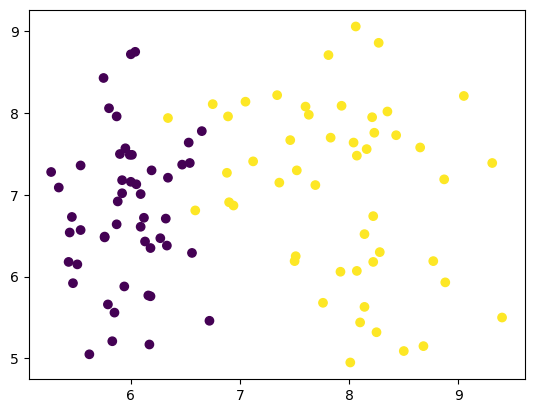

In [4]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input

In [7]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Set parameters to 0
model.get_weights()

[array([[-0.42718124, -0.43160886,  0.01254815,  0.09896064, -0.46860552,
          0.27160728,  0.03963286,  0.4546687 ,  0.1098153 , -0.18405813],
        [ 0.5527659 , -0.52279437,  0.18483889,  0.42558163, -0.27589697,
         -0.21030638,  0.1502235 ,  0.24668902, -0.27501997,  0.1515941 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.25213102],
        [-0.68512213],
        [ 0.57810944],
        [-0.36567935],
        [-0.42004928],
        [ 0.5806219 ],
        [ 0.00973111],
        [-0.32580626],
        [ 0.33716315],
        [ 0.54755837]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.4539 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5414 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6939
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5258 - loss: 0.6928 - val_accuracy: 0.4500 - val_loss: 0.6938
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5375 - loss: 0.6927 - val_accuracy: 0.4500 - val_loss: 0.6939
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4945 - loss: 0.6933 - val_accuracy: 0.4500 - val_loss: 0.6939
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5219 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6940
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4828 - loss: 0.6934 - val_accuracy: 0.4500 - val_loss: 0.6942
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5297 - loss: 0.6926 - val_accuracy: 0.4500 - val_loss

In [15]:
model.get_weights()

[array([[ 0.18416438,  0.18416438,  0.18416438,  0.18416438,  0.18416438,
          0.18416438,  0.18416438,  0.18416438,  0.18416436,  0.18416436],
        [-0.09235213, -0.09235213, -0.09235213, -0.09235213, -0.09235213,
         -0.09235213, -0.09235213, -0.09235213, -0.09235213, -0.09235213]],
       dtype=float32),
 array([-0.13056129, -0.13056129, -0.13056129, -0.13056129, -0.13056129,
        -0.13056129, -0.13056129, -0.13056129, -0.13056126, -0.13056126],
       dtype=float32),
 array([[0.02890812],
        [0.02890812],
        [0.02890812],
        [0.02890812],
        [0.02890812],
        [0.02890812],
        [0.02890812],
        [0.02890812],
        [0.02890812],
        [0.02890812]], dtype=float32),
 array([-0.03338518], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 558us/step


<Axes: >

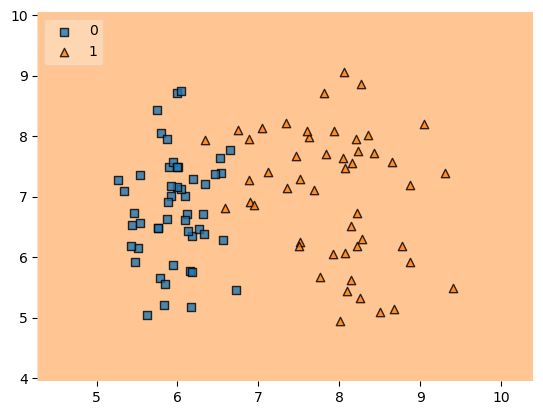

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)